In [2]:
import pandas as pd
filepath='/content/project2 - Sheet2.csv'
data=pd.read_csv(filepath)
data

,Properties,Judicial independence,Impartail courts,Protection of property rights,Poltical stablity,Rule oF law Index,Political freedom,Civil freedom,Gender Gap index,Correption perception index,GDP per capital,GCI,UNEMPLOYMENT,GII
0,United States,7.77,7.68,8.80,0.00,0.69,-2.0,-2.0,0.763,67.0,702.19,81.9,-4,61.3
1,China,4.41,3.78,7.48,-0.48,0.47,-7.0,-6.0,0.682,45.0,126.18,78.3,-5,54.3
2,Japan,7.80,7.77,9.32,1.03,0.79,-1.0,-1.0,0.656,73.0,398.27,79.9,-3,54.5
3,Germany,7.53,8.45,8.59,0.76,0.84,-1.0,-1.0,0.800,80.0,512.04,82.3,-3,57.3
4,India,6.29,5.36,5.45,-0.62,0.50,-2.0,-2.0,0.625,40.0,22.38,49.3,-7,36.4
5,Canada,7.98,7.90,8.86,0.94,0.80,-1.0,-1.0,0.772,74.0,523.59,82.4,-5,53.1
6,Russia,4.16,3.49,4.44,-0.65,0.46,-7.0,-7.0,0.708,29.0,125.93,56.5,-5,36.6
7,Italy,6.21,5.00,6.57,0.58,0.66,-1.0,-1.0,0.721,56.0,357.70,78.6,-8,45.7
8,United Kingdom,7.76,7.45,8.75,0.54,0.79,-1.0,-1.0,0.775,78.0,465.86,79.7,-4,59.8
9,France,7.13,7.30,8.52,0.37,0.72,-1.0,-2.0,0.784,71.0,436.59,81.3,-7,55.0


Predicting the best feature

In [ ]:
y_cols =([("GDP per capital"),("Properties")])
X=data.drop(y_cols,axis=1)
Y=data[y_cols]
Y=Y.drop("Properties",axis=1)

In [ ]:
features=list(X)
features

['Judicial independence',
 'Impartail courts',
 'Protection of property rights',
 'Poltical stablity',
 'Rule oF law Index ',
 'Political freedom',
 'Civil freedom',
 'Gender Gap index',
 'Correption perception index',
 'GCI',
 'UNEMPLOYMENT ',
 'GII']

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,
                                                    random_state=72018)

In [ ]:
R_2=[]
pipe = Pipeline([('ss',StandardScaler() ),('lr', LinearRegression())])

for feature in features:
    pipe.fit(X_train[[feature]],y_train)
    R_2.append(pipe.score(X_train[[feature]],y_train))


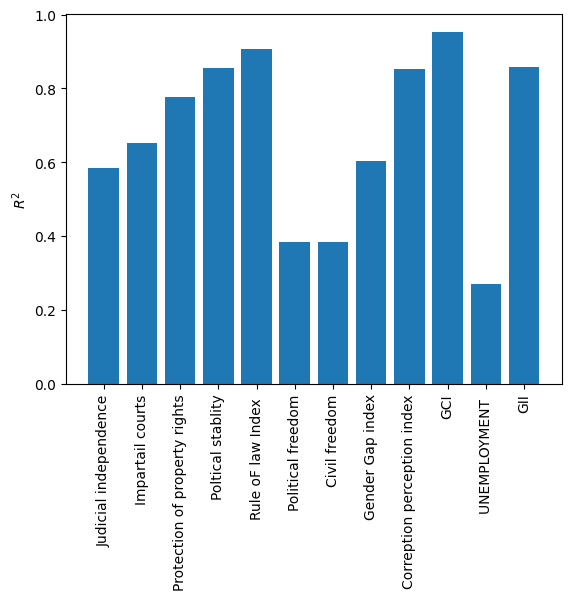

In [ ]:
plt.bar(features,R_2)
plt.xticks(rotation=90)
plt.ylabel("$R^2$")
plt.show()

In [ ]:
best=features[np.argmax(R_2)]
best

'GCI'

In [ ]:
sorted_features=[features[i] for i in np.argsort(np.negative(R_2))]
sorted_features

['GCI',
 'Rule oF law Index ',
 'GII',
 'Poltical stablity',
 'Correption perception index',
 'Protection of property rights',
 'Impartail courts',
 'Gender Gap index',
 'Judicial independence',
 'Political freedom',
 'Civil freedom',
 'UNEMPLOYMENT ']

As from above we can see that after GCI(global compitetive index) Rule of law index is 2nd best feature upon which GDP of country is dependent which shows that the country which have high ROLI score(Rule oF law Index score) is performing good and has good GDP

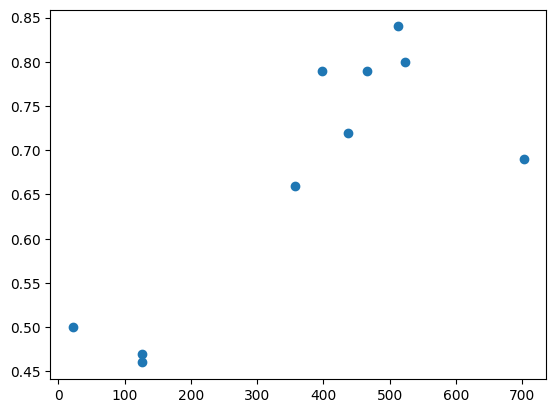

In [ ]:
plt.plot(data["GDP per capital"],
         data["Rule oF law Index "],
         ls='',marker='o')


In [ ]:
data["GDP per capital"]


0    702.19
1    126.18
2    398.27
3    512.04
4     22.38
5    523.59
6    125.93
7    357.70
8    465.86
9    436.59
Name: GDP per capital, dtype: float64

In [ ]:
data["Rule oF law Index "]

0    0.69
1    0.47
2    0.79
3    0.84
4    0.50
5    0.80
6    0.46
7    0.66
8    0.79
9    0.72
Name: Rule oF law Index , dtype: float64

NOw seeing the correlations between all the features

In [ ]:
float_columns=[x for x in data.columns if x != 'Properties']
corr_mat=data[float_columns].corr()
for x in range(len(float_columns)):
  corr_mat.iloc[x,x]=0.0
corr_mat

,Judicial independence,Impartail courts,Protection of property rights,Poltical stablity,Rule oF law Index,Political freedom,Civil freedom,Gender Gap index,Correption perception index,GDP per capital,GCI,UNEMPLOYMENT,GII
Judicial independence,0.000000,0.961740,0.798916,0.781758,0.902321,0.904439,0.905159,0.459650,0.896253,0.793869,0.555872,0.336503,0.628459
Impartail courts,0.961740,0.000000,0.841213,0.775148,0.928808,0.818207,0.809626,0.563740,0.931559,0.817715,0.608041,0.479135,0.698727
Protection of property rights,0.798916,0.841213,0.000000,0.763803,0.832550,0.591897,0.623803,0.502261,0.922864,0.791112,0.869475,0.519170,0.923075
Poltical stablity,0.781758,0.775148,0.763803,0.000000,0.933630,0.763866,0.779332,0.467889,0.873318,0.689403,0.740716,0.312837,0.570315
Rule oF law Index,0.902321,0.928808,0.832550,0.933630,0.000000,0.819331,0.820969,0.632530,0.968803,0.818225,0.731157,0.438147,0.695981
Political freedom,0.904439,0.818207,0.591897,0.763866,0.819331,0.000000,0.984814,0.357795,0.780997,0.615589,0.419886,-0.010456,0.388222
Civil freedom,0.905159,0.809626,0.623803,0.779332,0.820969,0.984814,0.000000,0.310530,0.791319,0.608505,0.452128,0.046297,0.425790
Gender Gap index,0.459650,0.563740,0.502261,0.467889,0.632530,0.357795,0.310530,0.000000,0.651248,0.758838,0.651599,0.212831,0.620340
Correption perception index,0.896253,0.931559,0.922864,0.873318,0.968803,0.780997,0.791319,0.651248,0.000000,0.833387,0.810318,0.442158,0.828396
GDP per capital,0.793869,0.817715,0.791112,0.689403,0.818225,0.615589,0.608505,0.758838,0.833387,0.000000,0.794212,0.411705,0.802932


In [ ]:
corr_mat.abs().idxmax()

Judicial independence                         Impartail courts
Impartail courts                         Judicial independence
Protection of property rights                              GII
Poltical stablity                           Rule oF law Index 
Rule oF law Index                  Correption perception index
Political freedom                                Civil freedom
Civil freedom                                Political freedom
Gender Gap index                               GDP per capital
Correption perception index                 Rule oF law Index 
GDP per capital                    Correption perception index
GCI                                                        GII
UNEMPLOYMENT                                               GII
GII                              Protection of property rights
dtype: object

Here we are able to see that the GDP per capital is more correlated with Correption perception index and GCI is correlated with GII(gender Innequality index)

(array([1., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
        0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 22.38  ,  35.9762,  49.5724,  63.1686,  76.7648,  90.361 ,
        103.9572, 117.5534, 131.1496, 144.7458, 158.342 , 171.9382,
        185.5344, 199.1306, 212.7268, 226.323 , 239.9192, 253.5154,
        267.1116, 280.7078, 294.304 , 307.9002, 321.4964, 335.0926,
        348.6888, 362.285 , 375.8812, 389.4774, 403.0736, 416.6698,
        430.266 , 443.8622, 457.4584, 471.0546, 484.6508, 498.247 ,
        511.8432, 525.4394, 539.0356, 552.6318, 566.228 , 579.8242,
        593.4204, 607.0166, 620.6128, 634.209 , 647.8052, 661.4014,
        674.9976, 688.5938, 702.19  ]),
 <BarContainer object of 50 artists>)

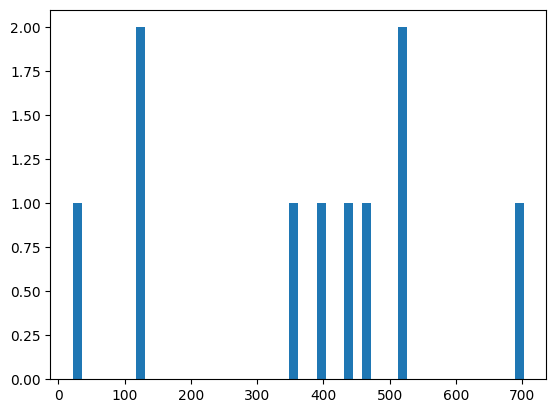

In [ ]:
plt.hist(data["GDP per capital"],bins=50)

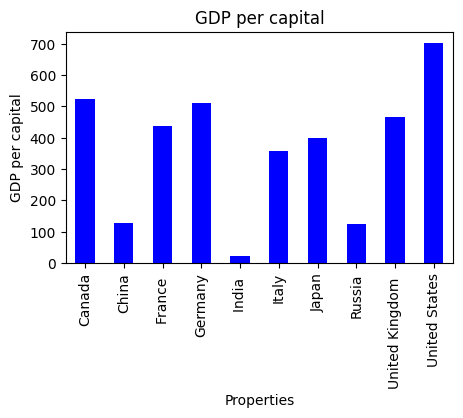

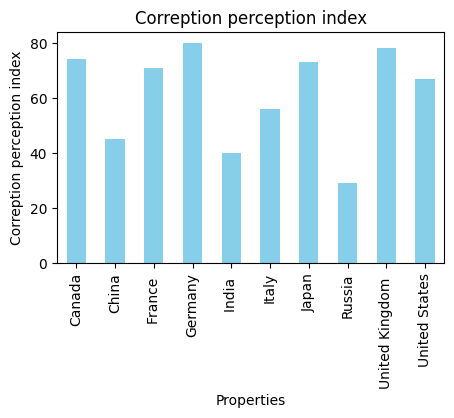

In [7]:
import matplotlib.pyplot as plt

# Group by categories and calculate the mean value
mean_values = data.groupby('Properties')['GDP per capital'].mean()

# Plotting
plt.figure(figsize=(5, 3))
mean_values.plot(kind='bar', color='blue')
plt.xlabel('Properties')
plt.ylabel('GDP per capital')
plt.title('GDP per capital')
plt.show()

import matplotlib.pyplot as plt

# Group by categories and calculate the mean value
mean_1 = data.groupby('Properties')['Correption perception index'].mean()

# Plotting
plt.figure(figsize=(5, 3))
mean_1.plot(kind='bar', color='skyblue')
plt.xlabel('Properties')
plt.ylabel('Correption perception index')
plt.title('Correption perception index')
plt.show()


Here also we are able to see countries with high Correption perception index score have good economy